# Innomatics Research Labs 
# Innominions
# Innomatics_Internship

In [238]:
# Importing the Neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [239]:
# Reading the Dataset
df = pd.read_csv('data.csv')

In [240]:
# Checking first 5 rows of the Dataset
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [241]:
# Checking the basic info of the Dataset
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [242]:
# basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [243]:
# Checking for the Null-Values in the Dataset
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

Text(0.5, 1.0, 'Missing values in The Dataset ')

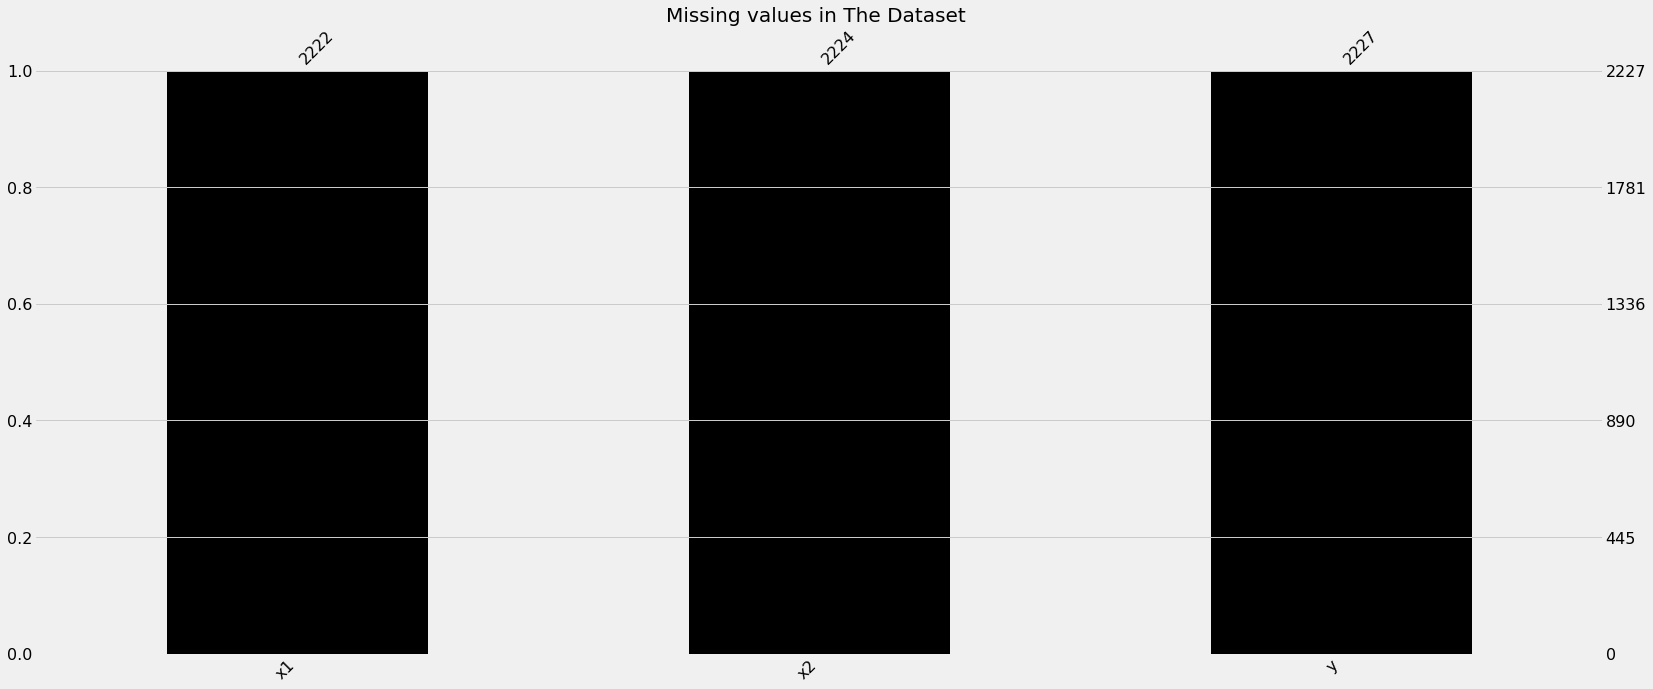

In [244]:
mno.bar(df.iloc[:,:3],color='black')
plt.title("Missing values in The Dataset ",fontsize=20)

In [245]:
# There are some missing values in the Dataset in x1 and x2

In [246]:
# Checking for the Data Distribution to fill the missing values

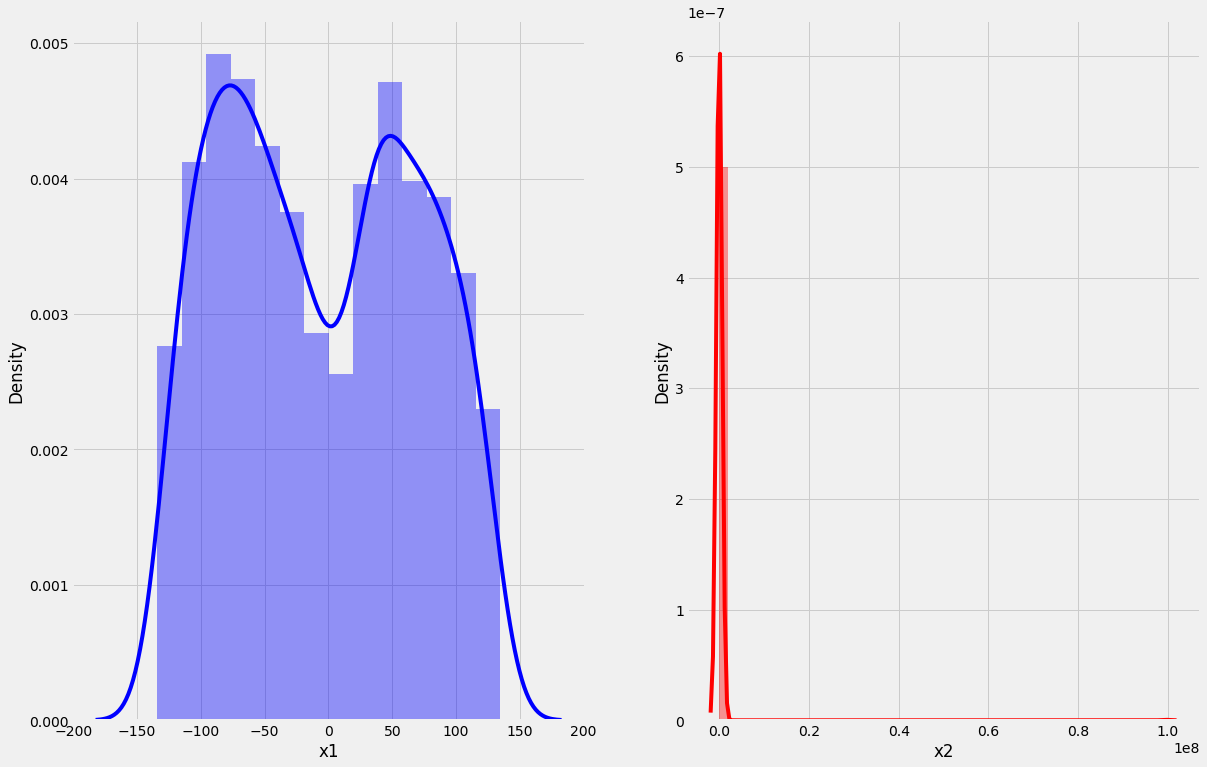

In [247]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,12))
plt.subplot(1,2,1)
sns.distplot(df['x1'],color='blue')

plt.subplot(1,2,2)
sns.distplot(df['x2'],color='red')
plt.show()

In [248]:
# Filling the missing values with the median 
df['x1'] = df['x1'].fillna(df['x1'].median())
df['x2'] = df['x2'].fillna(df['x2'].median())

In [249]:
# Checking for the Null-Values after Imputing them with median
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

Text(0.5, 1.0, 'Missing values in The Dataset ')

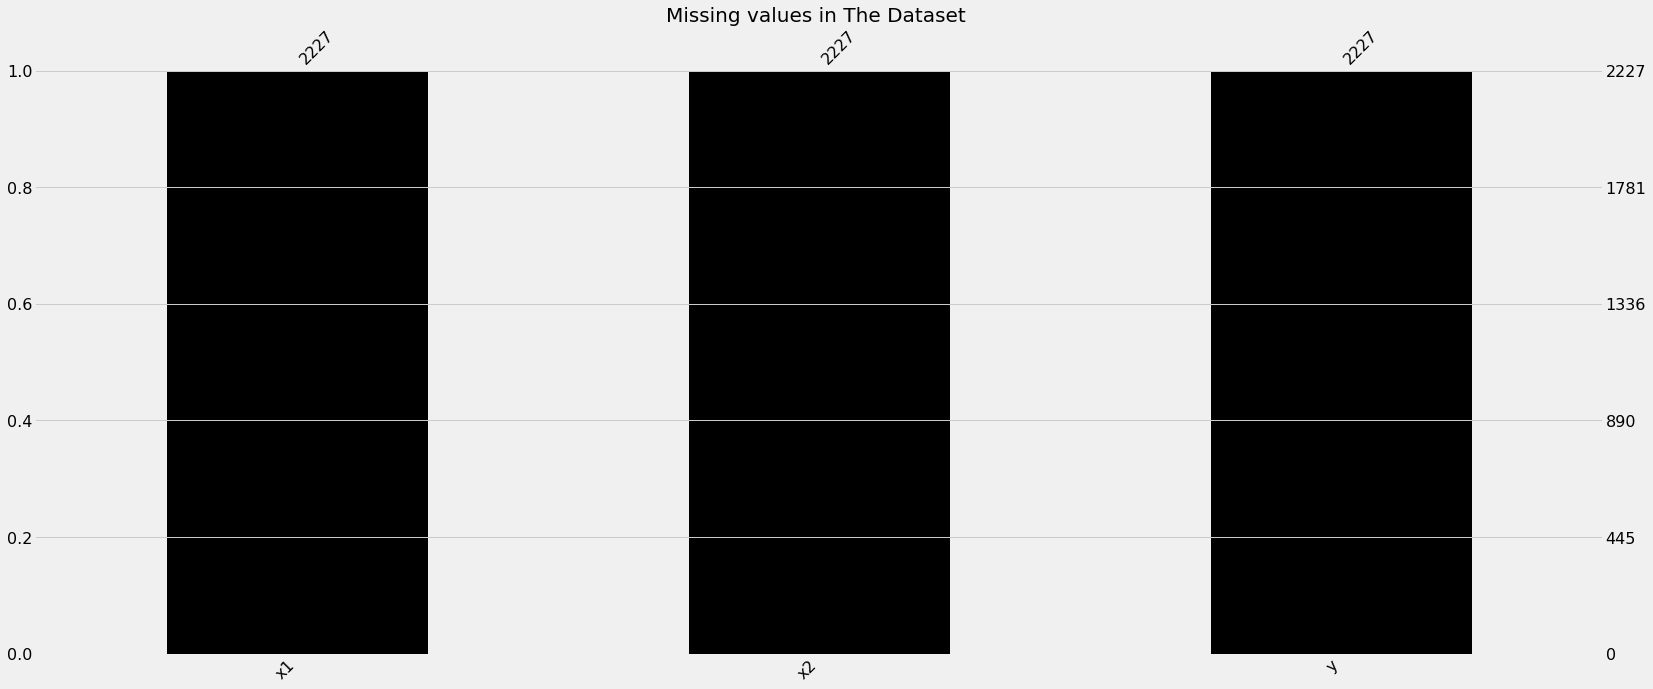

In [250]:
mno.bar(df.iloc[:,:3],color='black')
plt.title("Missing values in The Dataset ",fontsize=20)

In [251]:
#There are no Null-Values in the Dataset

## Checking for the Outliers in the Dataset

In [252]:
df.shape

(2227, 3)

In [253]:
# Checking the Description before handling the Outliers
df.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-4.830032,8.935572e+04,0.442299
std,74.856074,2.981313e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-7.997687e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.633331,6.374987e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [254]:
# Using inter Quantile range for removing Outliers
# The difference between the 3rd Quantile(Q3) - 1st Quantile(Q1) is called Inter Quantile Range

In [255]:
for feature in ['x1','x2']:
    IQR = df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_boundary = df[feature].quantile(0.25) -(1.5 * IQR)
    upper_boundary = df[feature].quantile(0.75) + (1.5 * IQR)
    df.loc[df[feature]>=upper_boundary,feature]=upper_boundary
    df.loc[df[feature]<=lower_boundary,feature]=lower_boundary

In [256]:
# Checking the Description after handling the Outliers
df.describe()

,x1,x2,y
count,2227.000000,2227.000000,2227.000000
mean,-4.830032,-6.394959,0.442299
std,74.856074,80.220305,0.496771
min,-134.369160,-134.876132,0.000000
25%,-71.581453,-79.976866,0.000000
50%,-9.836555,-1.046151,0.000000
75%,59.633331,63.749871,1.000000
max,134.508687,279.339976,1.000000


## Checking for the Data Imbalance

In [257]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

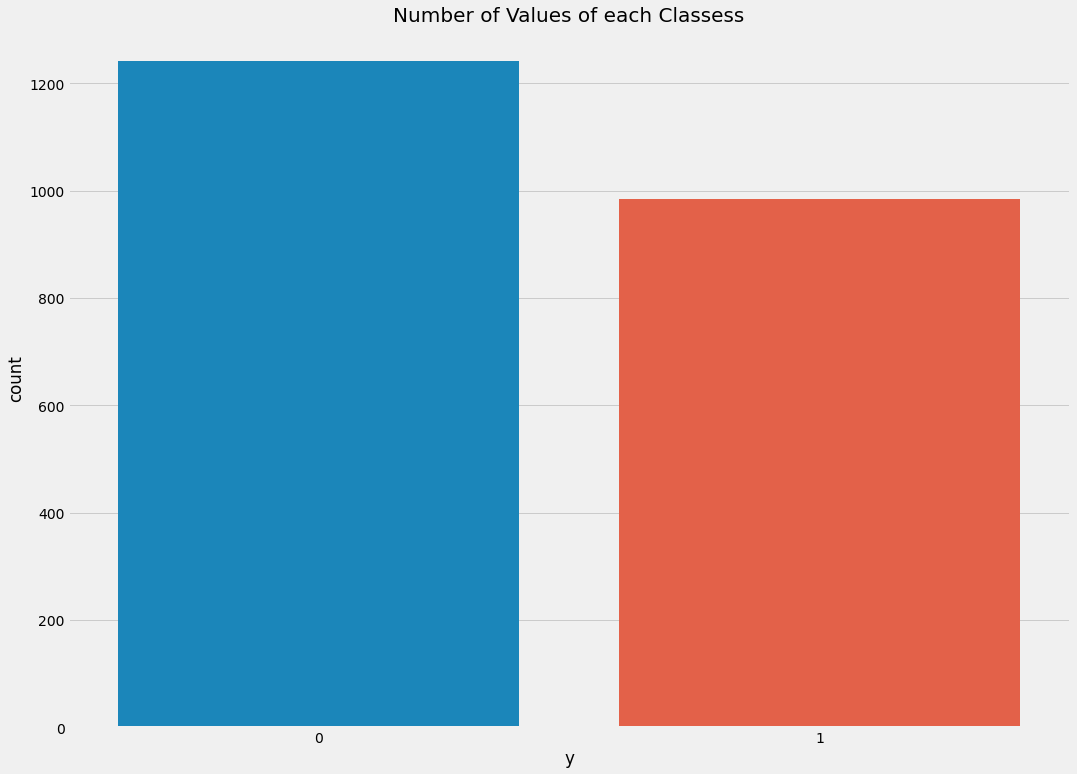

In [258]:
plt.figure(figsize=(16,12))
sns.countplot(df['y'])
plt.title("Number of Values of each Classess",fontsize=20)
plt.show()

In [259]:
# Seems like we have Almost Balanced Data

In [260]:
df['y'].unique()

array([1, 0], dtype=int64)

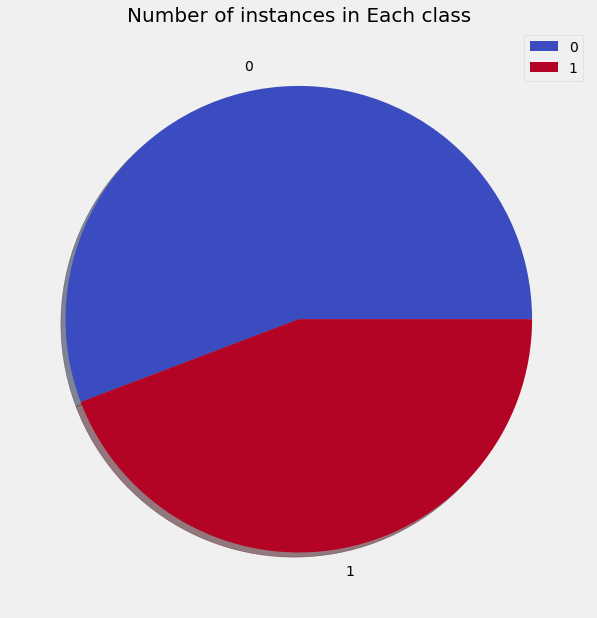

In [261]:
labels = ['0','1']
sizes = df['y'].value_counts()
colors = plt.cm.coolwarm(np.linspace(0,1,2))
explode = [0.0,0.0]

plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title("Number of instances in Each class",fontsize=20)
plt.legend()
plt.show()

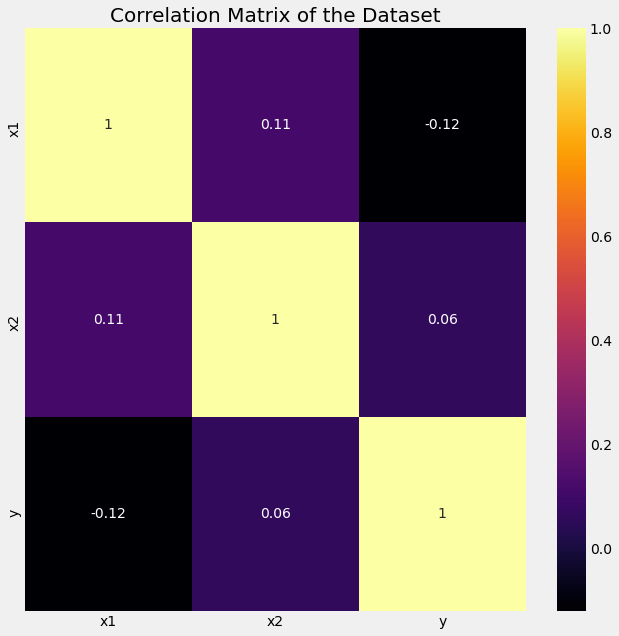

In [262]:
# Checking for the Correlation 
plt.figure(figsize=(10,10))
# mask = np.triu(df.corr())
# sns.heatmap(df.corr(),mask=mask,cmap='inferno')
sns.heatmap(df.corr(),cmap='inferno',annot=True)
plt.title("Correlation Matrix of the Dataset",fontsize=20)
plt.show()

### Differentiating the Dependent and independent variables

In [263]:
X = df.drop('y',axis=1)
y = df['y']

### Splitting the data into Training and Test Set

In [264]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Scaling the Data
#### Using Standard Scaler

In [265]:
# Creating an Object with Standard Scaler
scaler = StandardScaler()
# Using fit Transform because it will calculate the mean and std along with transforming the data
X_train = scaler.fit_transform(X_train)
# Using only Transform because Only the previous mean and std will assigned for the test data also
X_test = scaler.transform(X_test)

# 1. Using Logistic Regression

0.7234678624813154
[[363   0]
 [185 121]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       363
           1       1.00      0.40      0.57       306

    accuracy                           0.72       669
   macro avg       0.83      0.70      0.68       669
weighted avg       0.82      0.72      0.69       669



<AxesSubplot:>

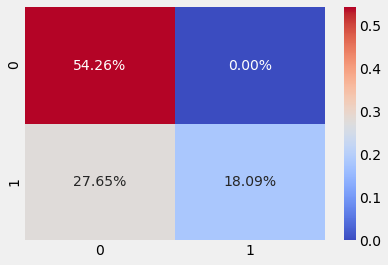

In [266]:
# Creating an Object for Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
lrmodel_preds = lrmodel.predict(X_test)

lrmodel_accuracy = accuracy_score(y_test,lrmodel_preds)

print(accuracy_score(y_test,lrmodel_preds))
print(confusion_matrix(y_test,lrmodel_preds))
print(classification_report(y_test,lrmodel_preds))
# Visualing the Confusion Matrix
cf_matrix = confusion_matrix(y_test,lrmodel_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='coolwarm')

In [267]:
X_train

array([[ 0.05866321,  0.23585794],
       [-0.61444356,  0.65015105],
       [-1.63150008, -1.46367603],
       ...,
       [ 0.33873029, -0.36809479],
       [ 1.02107469,  1.30316238],
       [-0.37633921, -0.0795173 ]])

In [268]:
accuracy = []
C_param_range = [0.001,0.01,0.1,1,10,100]
for c in C_param_range:
    lrmodel = LogisticRegression(C=c)
    lrmodel.fit(X_train,y_train)
    lrmodel_preds = lrmodel.predict(X_test)
#     print(accuracy_score(y_test,lrmodel_preds))
#     print(confusion_matrix(y_test,lrmodel_preds))
#     print(classification_report(y_test,lrmodel_preds))
    accuracy.append(accuracy_score(y_test,lrmodel_preds))

Text(0, 0.5, 'Error_rate')

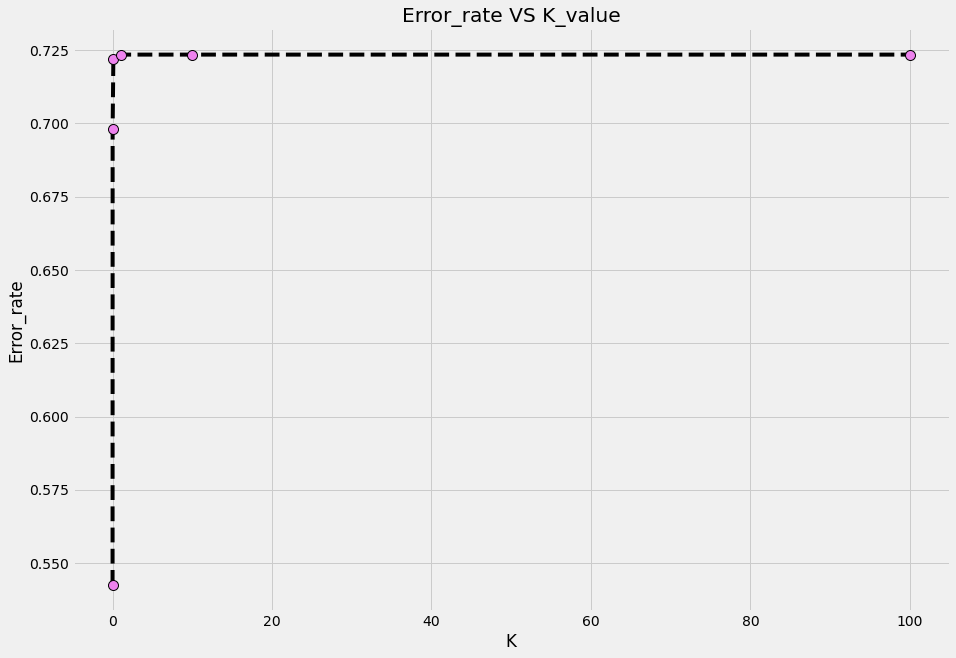

In [269]:
plt.figure(figsize=(14,10),)
plt.plot(C_param_range,accuracy,color='black',linestyle='dashed',marker='o',
        markerfacecolor='violet',markersize=10)
plt.title("Error_rate VS K_value")
plt.xlabel('K')
plt.ylabel('Error_rate')

# 2. Using SVM with Linear Kernel

0.7234678624813154
[[363   0]
 [185 121]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       363
           1       1.00      0.40      0.57       306

    accuracy                           0.72       669
   macro avg       0.83      0.70      0.68       669
weighted avg       0.82      0.72      0.69       669



<AxesSubplot:>

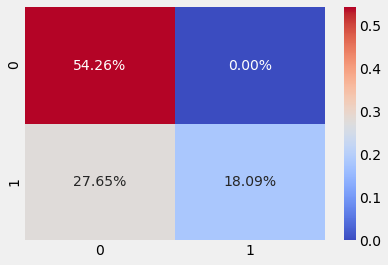

In [270]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train,y_train)
svc_linear_preds = svc_linear.predict(X_test)
svm_linear_accuracy = accuracy_score(y_test,svc_linear_preds)
print(accuracy_score(y_test,svc_linear_preds))
print(confusion_matrix(y_test,svc_linear_preds))
print(classification_report(y_test,svc_linear_preds))
cf_matrix = confusion_matrix(y_test,svc_linear_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='coolwarm')

# 3. Using SVM with RBF (Radial Basis Funcion)

0.9626307922272048
[[355   8]
 [ 17 289]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       363
           1       0.97      0.94      0.96       306

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



<AxesSubplot:>

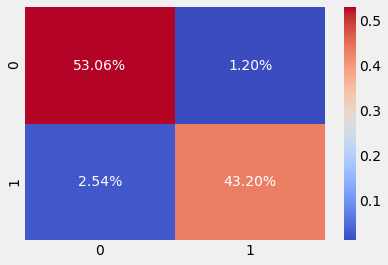

In [271]:
svc_rbf= SVC()
svc_rbf.fit(X_train,y_train)
svc_rbf_preds = svc_rbf.predict(X_test)

svc_rbf_accuracy = accuracy_score(y_test,svc_rbf_preds)

print(accuracy_score(y_test,svc_rbf_preds))
print(confusion_matrix(y_test,svc_rbf_preds))
print(classification_report(y_test,svc_rbf_preds))

cf_matrix = confusion_matrix(y_test,svc_rbf_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='coolwarm')

# 4. Decision Tree

0.9491778774289985
[[345  18]
 [ 16 290]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       363
           1       0.94      0.95      0.94       306

    accuracy                           0.95       669
   macro avg       0.95      0.95      0.95       669
weighted avg       0.95      0.95      0.95       669



<AxesSubplot:>

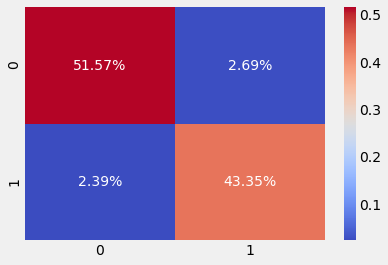

In [272]:
tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_preds = tree.predict(X_test)

tree_accuracy = accuracy_score(y_test,tree_preds)

print(accuracy_score(y_test,tree_preds))
print(confusion_matrix(y_test,tree_preds))
print(classification_report(y_test,tree_preds))

cf_matrix = confusion_matrix(y_test,tree_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='coolwarm')

In [278]:
# Hyper Parameters for Decision Tree

In [273]:
# Creating a Dictionary with the parameters to use in Decision Tree
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,5)]
min_samples_split = [3,4,5,6,9]
min_samples_leaf = [2,4,6,8]
random_grid = {'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [3, 4, 5, 6, 9], 'min_samples_leaf': [2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [274]:
# Creating an object for Decision Tree
dec_tree = DecisionTreeClassifier()
# Initializing the RandomSearchCV with Random grid parameters.
tree_random_grid = RandomizedSearchCV(estimator=dec_tree,param_distributions=random_grid,
                                    n_iter=10,cv=3,random_state=100,n_jobs=-1,verbose=2)
#training the random search with training Data
tree_random_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 257, 505, 752, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [3, 4, 5, 6, 9]},
                   random_state=100, verbose=2)

In [224]:
# Checking for the Best Model from Randomized Search 
best_tree = tree_random_grid.best_estimator_

In [225]:
tree_random_grid.best_score_

0.9236030828516378

In [275]:
best_tree.fit(X_train,y_train)
best_tree_preds = best_tree.predict(X_test)
best_tree_accuracy = accuracy_score(y_test,best_tree_preds)

# 5 K-Nearest Neighbours

0.9626307922272048
[[349  14]
 [ 11 295]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       363
           1       0.95      0.96      0.96       306

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



<AxesSubplot:>

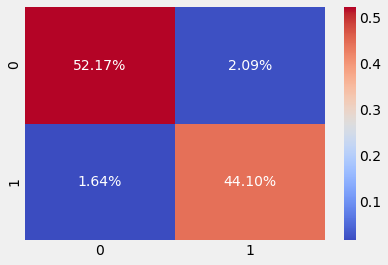

In [276]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,knn_preds)
print(accuracy_score(y_test,knn_preds))
print(confusion_matrix(y_test,knn_preds))
print(classification_report(y_test,knn_preds))
cf_matrix = confusion_matrix(y_test,knn_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='coolwarm')

In [222]:
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error_rate')

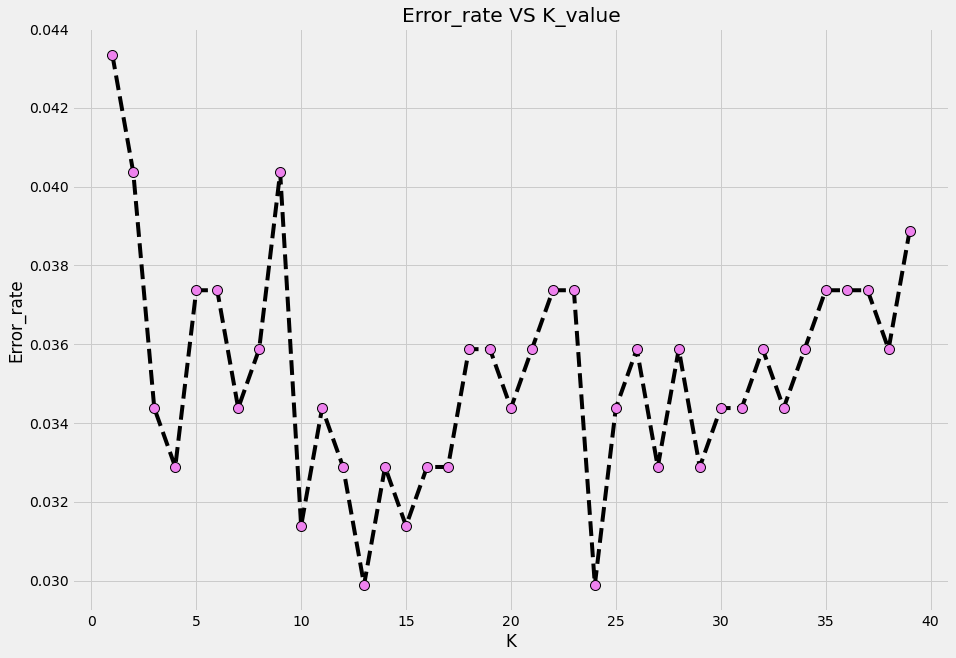

In [223]:
plt.figure(figsize=(14,10),)
plt.plot(range(1,40),error_rate,color='black',linestyle='dashed',marker='o',
        markerfacecolor='violet',markersize=10)
plt.title("Error_rate VS K_value")
plt.xlabel('K')
plt.ylabel('Error_rate')

In [200]:
# We are getting very less error_rate at 14 and 24 neighbours

0.9701046337817638
[[355   8]
 [ 12 294]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       363
           1       0.97      0.96      0.97       306

    accuracy                           0.97       669
   macro avg       0.97      0.97      0.97       669
weighted avg       0.97      0.97      0.97       669



<AxesSubplot:>

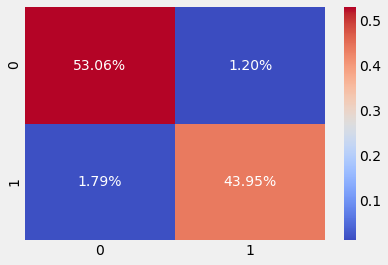

In [299]:
knn= KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

best_knn_accuracy = accuracy_score(y_test,knn_preds)

print(accuracy_score(y_test,knn_preds))
print(confusion_matrix(y_test,knn_preds))
print(classification_report(y_test,knn_preds))

cf_matrix = confusion_matrix(y_test,knn_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='coolwarm')

# Random Forest classifier

0.9626307922272048
[[351  12]
 [ 13 293]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       363
           1       0.96      0.96      0.96       306

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



<AxesSubplot:>

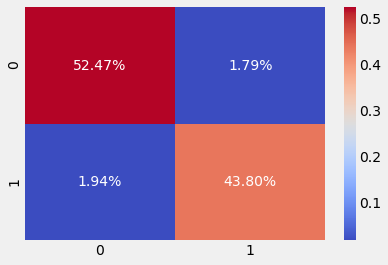

In [300]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test,rf_preds)

print(accuracy_score(y_test,rf_preds))
print(confusion_matrix(y_test,rf_preds))
print(classification_report(y_test,rf_preds))

cf_matrix = confusion_matrix(y_test,rf_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='coolwarm')

# Hyper Parameter Tuning for Random Forest

In [301]:
n_estimators = [int(x) for x in np.linspace(100,1000,5)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,5)]
min_samples_split = [3,4,5,6,9]
min_samples_leaf = [2,4,6,8]
random_grid = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [3, 4, 5, 6, 9], 'min_samples_leaf': [2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [302]:
rf = RandomForestClassifier()
# Initializing the RandomSearchCV with Random grid parameters.
rf_random_grid = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                                    n_iter=10,cv=3,random_state=100,n_jobs=-1,verbose=2)
#training the random search with training Data
rf_random_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 257, 505, 752, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [3, 4, 5, 6, 9],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=100, verbose=2)

In [303]:
best_rf_forest = rf_random_grid.best_estimator_

0.9581464872944694
[[348  15]
 [ 13 293]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       363
           1       0.95      0.96      0.95       306

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



<AxesSubplot:>

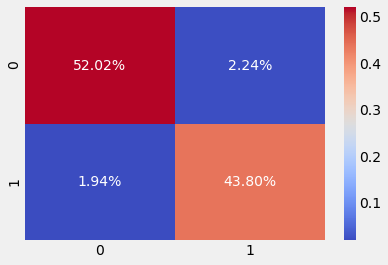

In [305]:
best_rf_forest.fit(X_train,y_train)
best_rf_forest_preds = best_rf_forest.predict(X_test)

best_rf_forest_accuracy = accuracy_score(y_test,best_rf_forest_preds)

print(accuracy_score(y_test,best_rf_forest_preds))
print(confusion_matrix(y_test,best_rf_forest_preds))
print(classification_report(y_test,best_rf_forest_preds))

cf_matrix = confusion_matrix(y_test,best_rf_forest_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='coolwarm')

# (Optional)
##### XGB Classifier

In [229]:
# Creating object of XGBClassifier
xgb = XGBClassifier()

In [230]:
# Training XGBClassifier with training Data.
xgb.fit(X_train,y_train)

[15:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [232]:
xgb_preds = xgb.predict(X_test)
print(accuracy_score(y_test,xgb_preds))
print(confusion_matrix(y_test,xgb_preds))
print(classification_report(y_test,xgb_preds))

0.9551569506726457
[[350  13]
 [ 17 289]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       363
           1       0.96      0.94      0.95       306

    accuracy                           0.96       669
   macro avg       0.96      0.95      0.95       669
weighted avg       0.96      0.96      0.96       669



### Hyper Parameter Optimization for XGBClassifier

In [233]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [234]:
# initializing a model with random params
xbgclassifier = XGBClassifier()
random_search=RandomizedSearchCV(xbgclassifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [235]:
# Fitting the random search with train data
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[15:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [236]:
# Best Score from random search
random_search.best_score_

0.6275457224556489

In [237]:
# creating an object with best parameters
random_xgb = random_search.best_estimator_

In [322]:
models = pd.Series(['Logistic Regression','SVM Linear','SVM Rbf','Decison Tree','Best Decison Tree','Knn','Best Knn','Random Forest','Best Random Forest'])

In [323]:
accuracy_scores = pd.Series([lrmodel_accuracy,svm_linear_accuracy,svc_rbf_accuracy,tree_accuracy,best_tree_accuracy,knn_accuracy,best_knn_accuracy,rf_accuracy,best_rf_forest_accuracy])

In [324]:
# Plotting the Accuracies of All models

In [325]:
accuracy_df = pd.DataFrame()

In [326]:
accuracy_df['Models'] = models

In [327]:
accuracy_df['Accuracy Score'] = accuracy_scores

In [333]:
accuracy_df.style.background_gradient(cmap='Reds')

,Models,Accuracy Score
0,Logistic Regression,0.723468
1,SVM Linear,0.723468
2,SVM Rbf,0.962631
3,Decison Tree,0.949178
4,Best Decison Tree,0.952167
5,Knn,0.962631
6,Best Knn,0.970105
7,Random Forest,0.962631
8,Best Random Forest,0.958146


# Conclusion 

### As we have used so many algorithms , many of them have given best accuracies
### But Logistic Regression and SVM linear kernel hasn't performed well
### Although SVM rbf and Decison Trees given the best results they may results in Over fitting because as we know Decison trees are very much prone to Overfitting because of the Depth of the Tree
### So I'm choosign KNN for this Problem coz it is very easy to use
### Given the best Result